# Network Intrusion Detection: Step-by-Step EDA, Modeling, and Advanced Analysis

## Project Overview
We are building an intelligent and adaptive intrusion detection system using machine learning. This notebook explains every step in simple language, with present continuous tense comments and markdown for clarity. All work is done on your own dataset.

## 1. Importing Libraries
We are importing all the libraries needed for data analysis, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Training and Test Datasets
We are loading both the training and external test data, and displaying the first few rows to understand the structure.

In [4]:
import os
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
train_path = os.path.abspath(os.path.join(notebook_dir, '..', 'data', 'raw-data', 'Train_data.csv'))
test_path = os.path.abspath(os.path.join(notebook_dir, '..', 'data', 'raw-data', 'Test_data.csv'))
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
print('Train shape:', df_train.shape)
print('Test shape:', df_test.shape)
df_train.head()

Train shape: (25192, 42)
Test shape: (22544, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## 3. Checking Columns and Data Types
We are listing all columns and their data types to know which features are categorical and which are numerical.

In [7]:
print('Columns:', list(df_train.columns))
print('\nData types:')
print(df_train.dtypes)

Columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']

Data types:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land  

## 4. Checking for Missing Values and Duplicates
We are checking if there are any missing values or duplicate rows in the training and test datasets.

In [8]:
for name, df in [('Train', df_train), ('Test', df_test)]:
    missing = df.isnull().sum()
    print(f'{name} missing values:')
    print(missing[missing > 0])
    duplicates = df.duplicated().sum()
    print(f'{name} duplicate rows: {duplicates}')

Train missing values:
Series([], dtype: int64)
Train duplicate rows: 0
Test missing values:
Series([], dtype: int64)
Test duplicate rows: 57


In [9]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
print("Duplicates removed from both train and test sets (if any).")

Duplicates removed from both train and test sets (if any).


## 4a. Handling Missing Values (Completeness)
We are explicitly handling missing values. If none are found, we are stating this for completeness.

In [11]:
for df in [df_train, df_test]:
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print('No missing values found. No imputation needed.')
    else:
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                if df[col].dtype in ['float64', 'int64']:
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    df[col].fillna(df[col].mode()[0], inplace=True)
        print('Missing values imputed.')

No missing values found. No imputation needed.
No missing values found. No imputation needed.


## 5. Class Distribution (Target Variable)
We are analyzing the distribution of the target variable ('class') in both train and test sets to check for imbalance.

Train class distribution:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


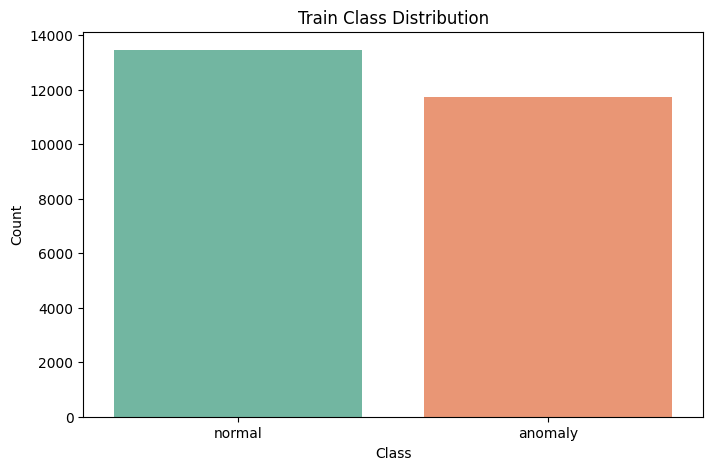

In [12]:
for name, df in [('Train', df_train)]:
    class_counts = df['class'].value_counts()
    print(f'{name} class distribution:')
    print(class_counts)
    plt.figure(figsize=(8,5))
    sns.countplot(x='class', data=df, palette='Set2')
    plt.title(f'{name} Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

## 6. Univariate Analysis
We are analyzing each feature separately. We are plotting histograms for numerical features and bar plots for categorical features (on the training set).

Numerical columns: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
Categorical columns: ['protocol_type', 'service', 'flag']


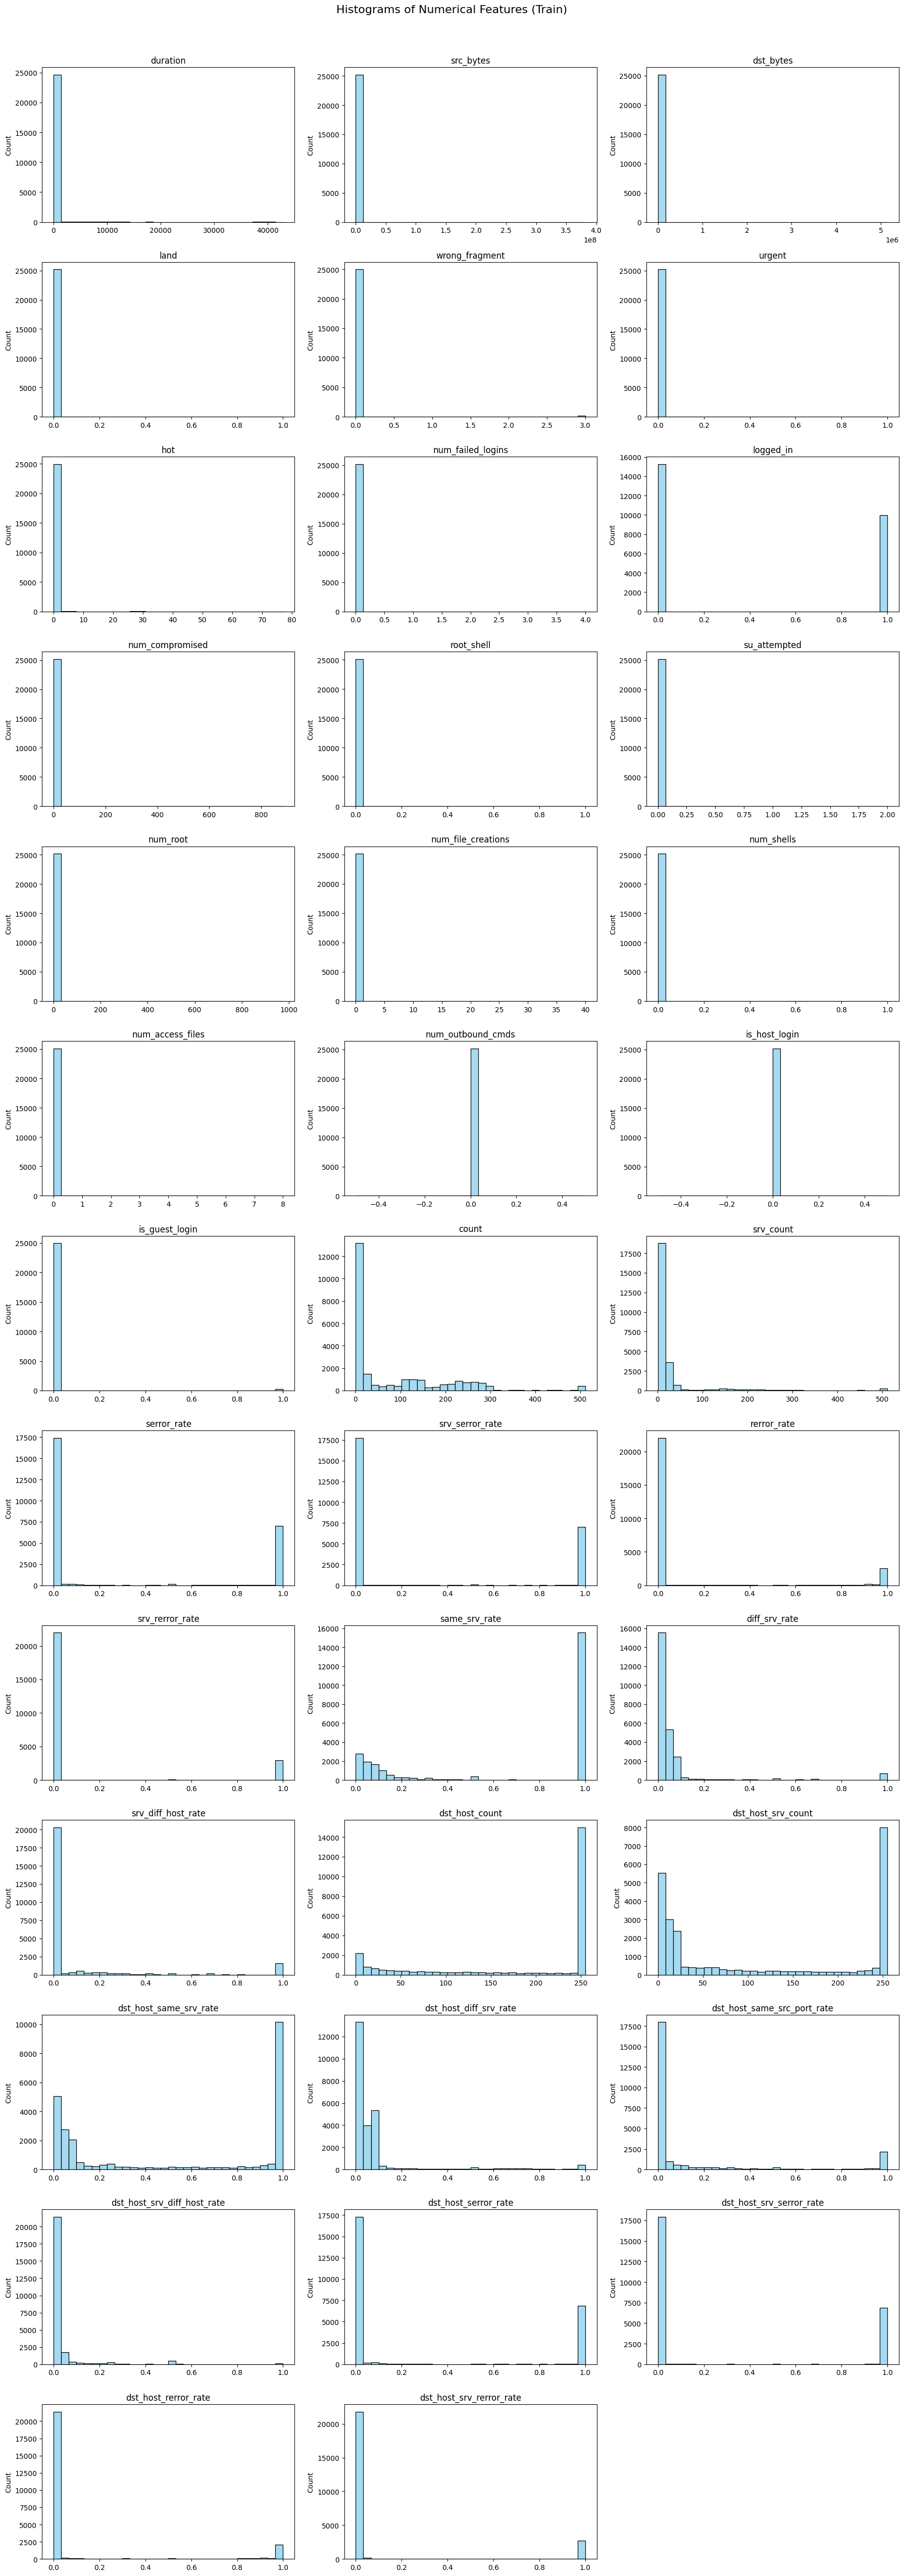

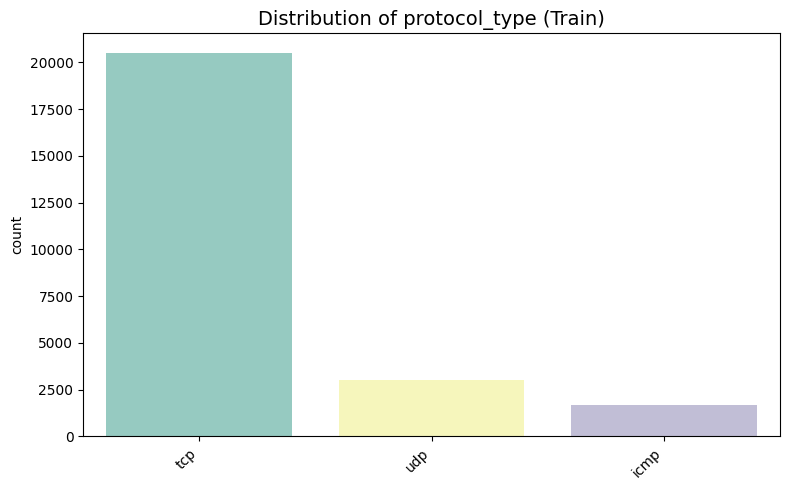

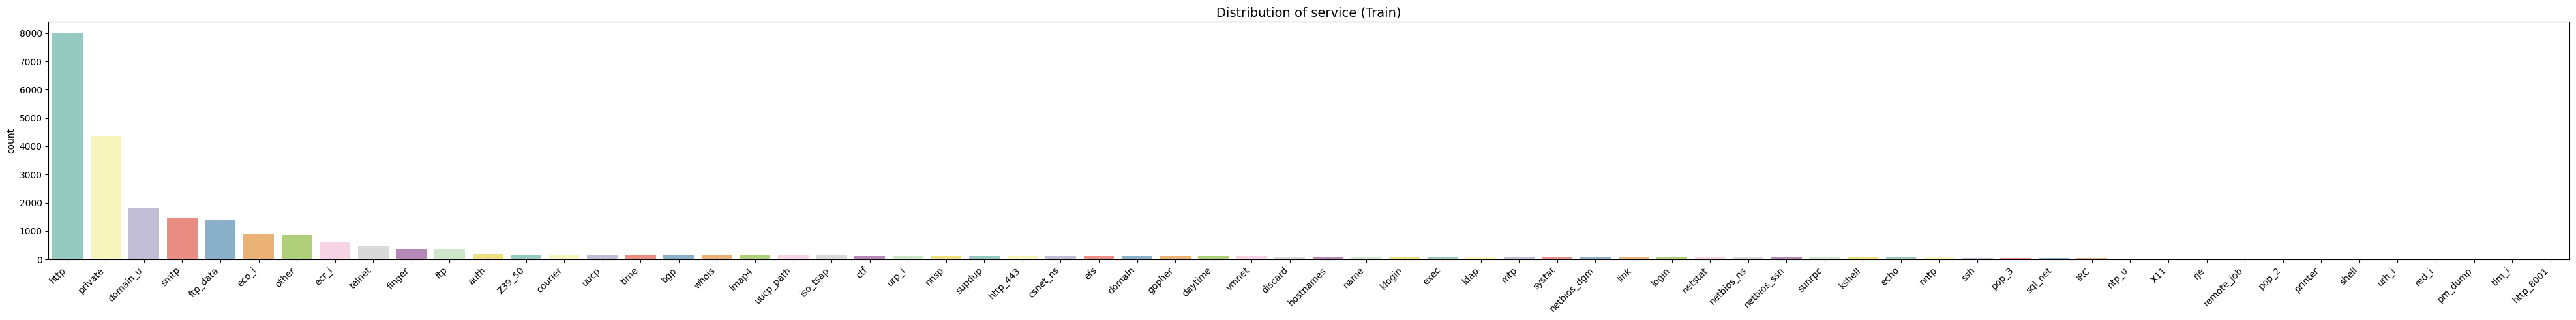

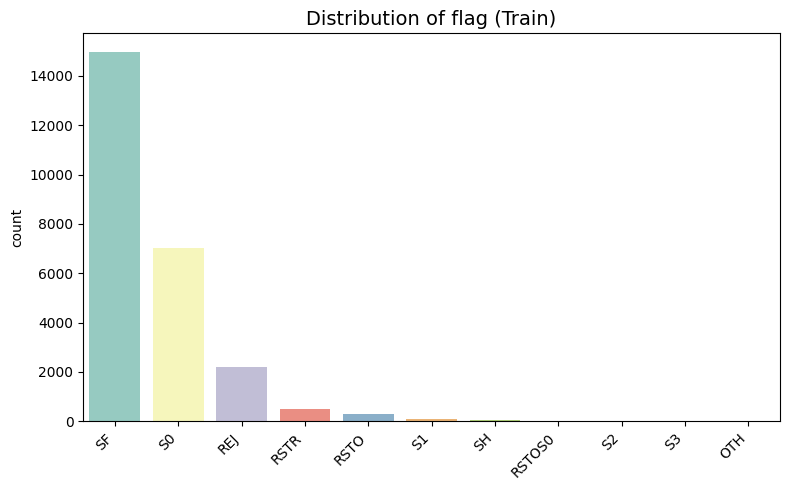

In [13]:
import math

# Separate columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
if 'class' in categorical_cols:
    categorical_cols.remove('class')

print('Numerical columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

# Better layout for numerical columns
n_num = len(numerical_cols)
n_cols = 3  # number of subplots per row
n_rows = math.ceil(n_num / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_train[col], bins=30, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histograms of Numerical Features (Train)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Improved categorical plots
for col in categorical_cols:
    plt.figure(figsize=(max(8, len(df_train[col].unique()) * 0.6), 5))
    order = df_train[col].value_counts().index  # sorted bars
    sns.countplot(x=col, data=df_train, order=order, palette='Set3')
    plt.title(f'Distribution of {col} (Train)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

## 7. Bivariate Analysis
We are analyzing the relationship between features and the target variable in the training set.

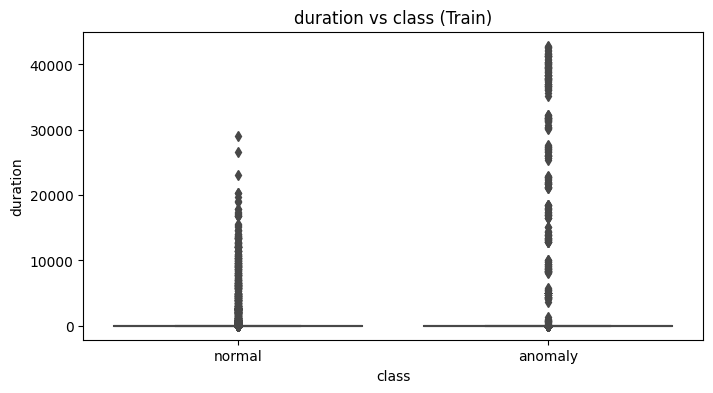

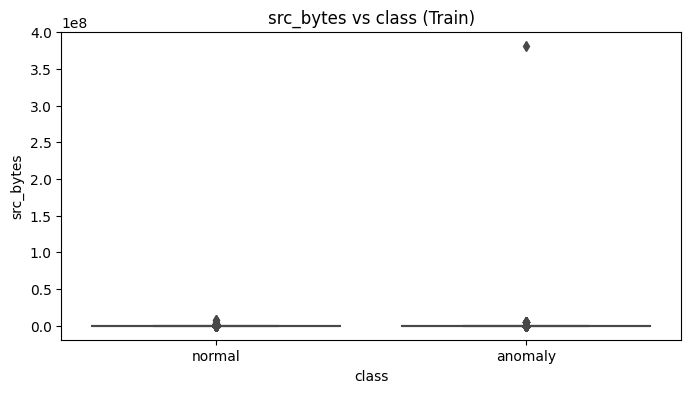

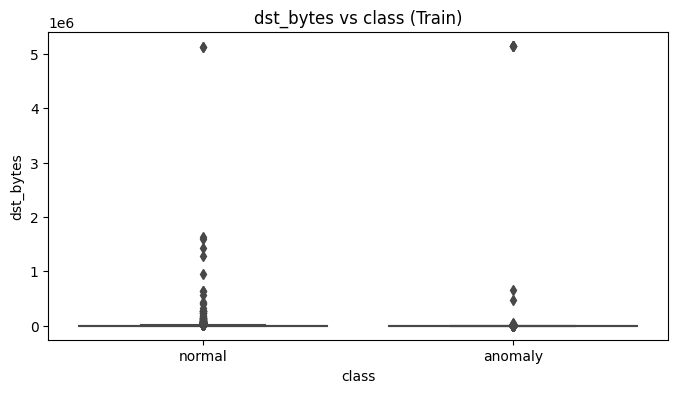

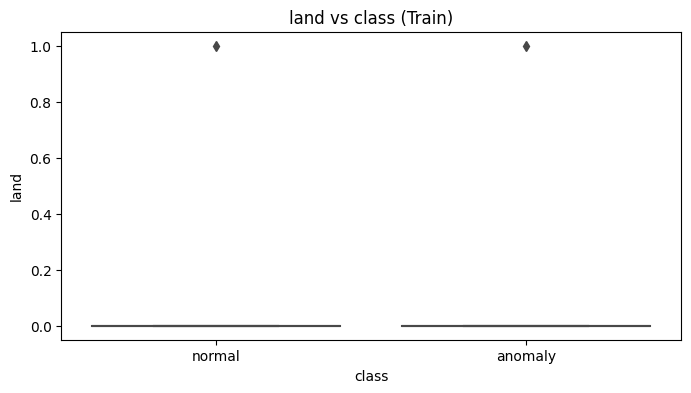

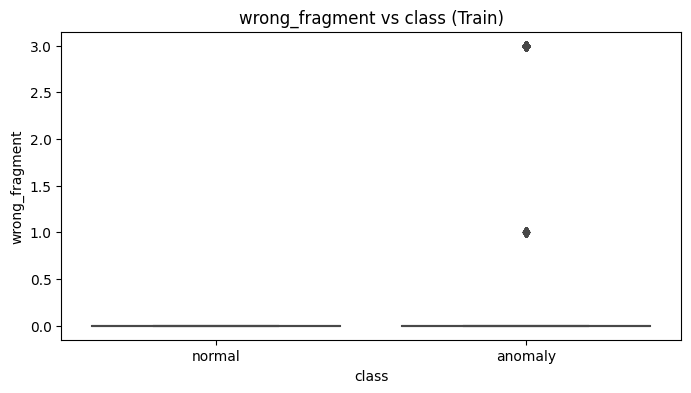

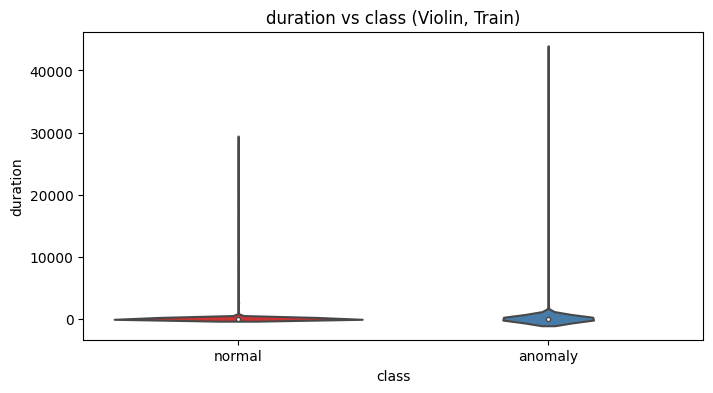

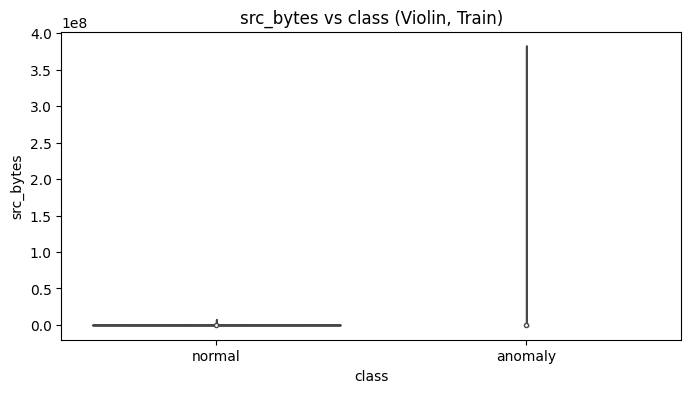

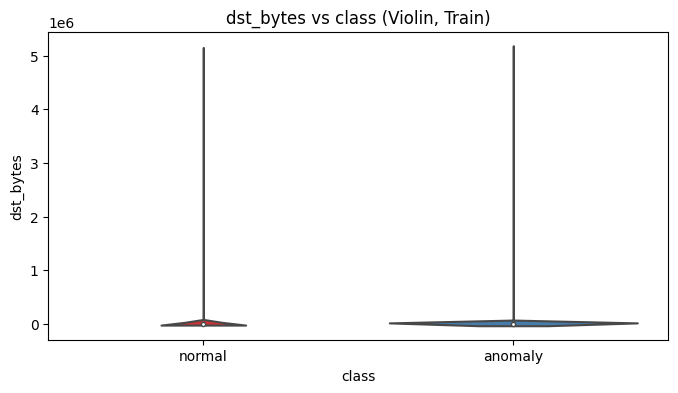

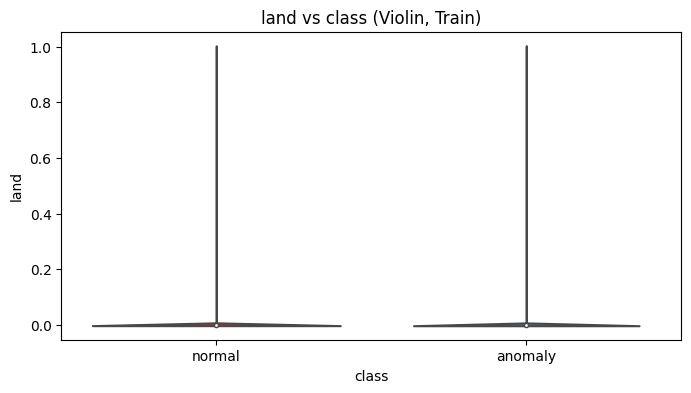

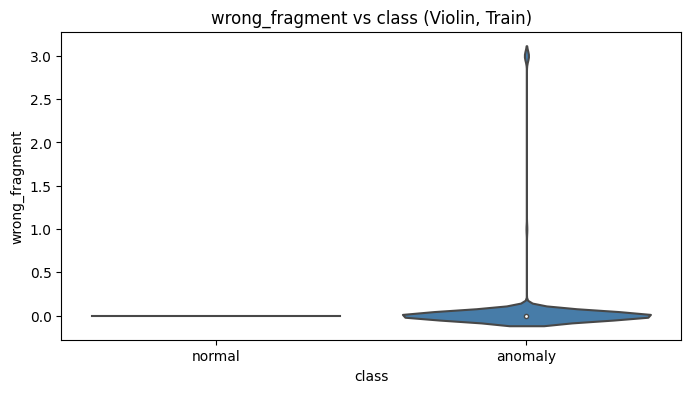

In [14]:
for col in numerical_cols[:5]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='class', y=col, data=df_train, palette='Set1')
    plt.title(f'{col} vs class (Train)')
    plt.show()
for col in numerical_cols[:5]:
    plt.figure(figsize=(8,4))
    sns.violinplot(x='class', y=col, data=df_train, palette='Set1')
    plt.title(f'{col} vs class (Violin, Train)')
    plt.show()

## 8. Correlation Analysis
We are calculating the correlation between numerical features in the training set.

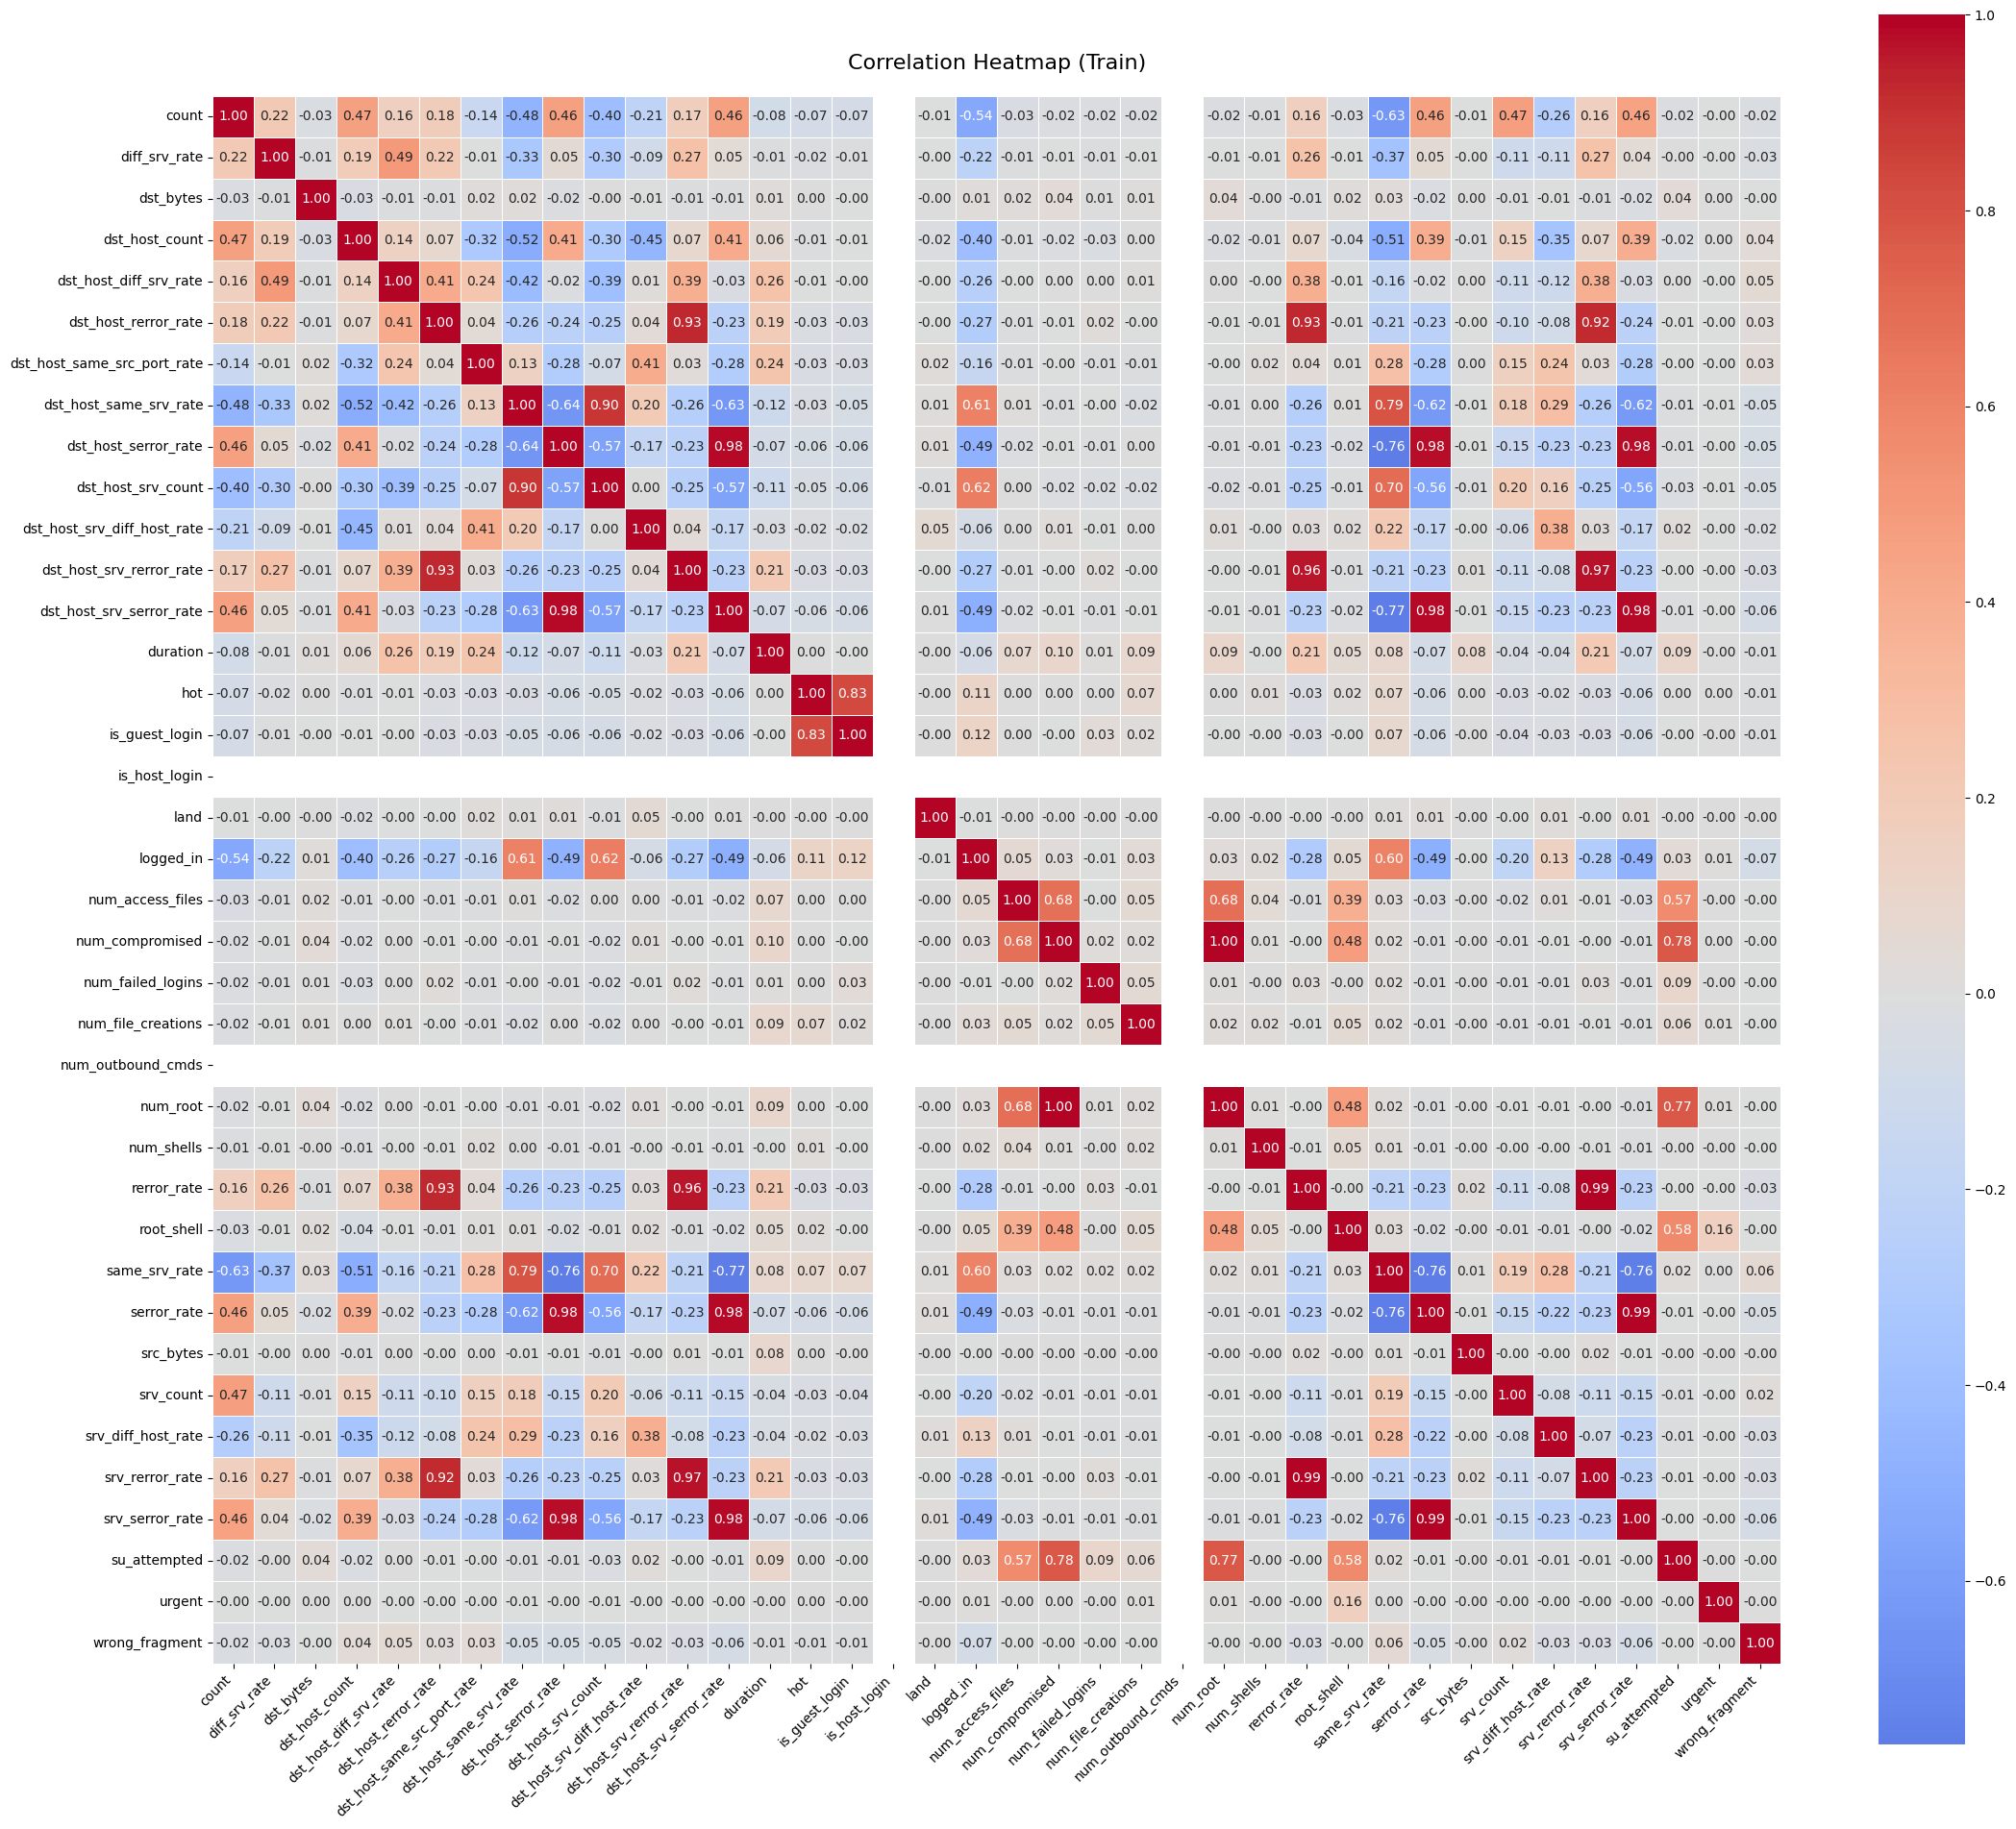

In [15]:
# Compute correlation matrix
corr = df_train[numerical_cols].corr()

# Sort features (optional) for better structure
corr = corr.reindex(sorted(corr.columns), axis=0).reindex(sorted(corr.columns), axis=1)

# Create figure
plt.figure(figsize=(len(corr.columns) * 0.6, len(corr.columns) * 0.6))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    annot=True,           # show correlation values
    fmt=".2f",            # two decimal places
    linewidths=0.5,       # lines between cells
    cbar_kws={'shrink': 0.8},  # smaller color bar
    square=True
)

plt.title('Correlation Heatmap (Train)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


## 9. Feature Selection (with Reasoning)
We are selecting features for modeling. We are removing columns with very low variance or high correlation, and explaining our choices.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Step 1: Remove features with zero variance
low_variance_cols = [col for col in numerical_cols if df_train[col].nunique() == 1]
print('Columns with zero variance:', low_variance_cols)
selected_features = [col for col in numerical_cols if col not in low_variance_cols]

# Step 2: Remove highly correlated features (correlation > 0.95)
corr_matrix = df_train[selected_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('Highly correlated columns to drop:', to_drop)
selected_features = [col for col in selected_features if col not in to_drop]

# Step 3: Feature Selection using Random Forest
X_train_fs = df_train[selected_features]
y_train_fs = df_train['class']

rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_fs, y_train_fs)

# Select top N features (e.g., 10)
selector = SelectFromModel(rf_selector, max_features=10, prefit=True)
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_train_fs.columns[selected_indices].tolist()
print("Top 10 features selected by Random Forest:", selected_feature_names)

# Step 4: Add required network features
required_features = [
    'duration', 'src_bytes', 'dst_bytes', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_shells', 'count',
    'srv_count', 'serror_rate', 'rerror_rate', 'protocol_type', 'service'
]
for feat in required_features:
    if feat in df_train.columns and feat not in selected_feature_names:
        selected_feature_names.append(feat)
print('Final selected features for modeling (with required network features):', selected_feature_names)

# Step 5: Subset the data
X_train_selected = df_train[selected_feature_names]
X_test_selected = df_test[selected_feature_names]


Columns with zero variance: ['num_outbound_cmds', 'is_host_login']
Highly correlated columns to drop: ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']
Highly correlated columns to drop: ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']
Top 10 features selected by Random Forest: ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate']
Final selected features for modeling (with required network features): ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'duration', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_shells', 'srv_count', 'serror_rate', 'rerror_rate', 'protocol_type', 'servic

## 9a. Justification for Correlation Threshold
We are using a correlation threshold of 0.95 to remove highly correlated features. This helps reduce multicollinearity, improving model interpretability and stability, especially for linear models, without losing excessive information.

## 10. Data Preprocessing
We are encoding categorical features and scaling numerical features. We fit encoders and scalers on the training set, and apply them to both train and test sets.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features into numerical and categorical
numerical_features = X_train_selected.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_selected.select_dtypes(include=['object']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing to training and test data
X_train = preprocessor.fit_transform(X_train_selected)
X_test = preprocessor.transform(X_test_selected)

# Encode the target variable for the training data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df_train['class'])
# The test set does not have a 'class' column for evaluation purposes in this notebook,
# so we will not attempt to encode y_test.
# y_test = le.transform(df_test['class'])

print("Data preprocessed successfully.")

Data preprocessed successfully.


## 11. Advanced Feature Engineering
We are creating new features to help the model learn better patterns from the data.

In [19]:
# Get feature names after preprocessing
feature_names = []
for name, transformer, original_features in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        # For OneHotEncoder, pass the original feature names
        if name == 'cat':
            feature_names.extend(transformer.get_feature_names_out(original_features))
        else:
            feature_names.extend(original_features)
    else:
        feature_names.extend(original_features)

# Convert to dense DataFrame
X_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test.toarray(), columns=feature_names)

# Feature engineering (check columns exist)
for df_ in [X_train_df, X_test_df]:
    for col in ['src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'serror_rate', 'rerror_rate']:
        if col not in df_.columns:
            raise KeyError(f"Column '{col}' not found in DataFrame columns: {df_.columns.tolist()}")
    df_['src_dst_bytes_ratio'] = df_['src_bytes'] / (df_['dst_bytes'] + 1)
    df_['total_bytes'] = df_['src_bytes'] + df_['dst_bytes']
    df_['count_srv_ratio'] = df_['count'] / (df_['srv_count'] + 1)
    df_['same_diff_srv_ratio'] = df_['same_srv_rate'] / (df_['diff_srv_rate'] + 1e-5)
    df_['serror_rerror_ratio'] = df_['serror_rate'] / (df_['rerror_rate'] + 1e-5)
print('New features created for both train and test sets.')

# Optionally, reassign to X_train/X_test for downstream code
X_train = X_train_df
X_test = X_test_df

New features created for both train and test sets.


## 11a. Scaling Newly Engineered Features
We are scaling the newly engineered features after they are created, to ensure all features are on a similar scale and to prevent data leakage.

In [20]:
new_features = ['src_dst_bytes_ratio', 'total_bytes', 'count_srv_ratio', 'same_diff_srv_ratio', 'serror_rerror_ratio']
scaler_new = StandardScaler()
X_train[new_features] = scaler_new.fit_transform(X_train[new_features])
X_test[new_features] = scaler_new.transform(X_test[new_features])
print('Newly engineered features scaled.')

Newly engineered features scaled.


## 12. Data Balancing with SMOTE
We are using SMOTE to balance the classes in the training data.

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print('After SMOTE, class distribution:')
print(pd.Series(y_train_bal).value_counts())

After SMOTE, class distribution:
1    13449
0    13449
Name: count, dtype: int64


## 13. Hyperparameter Optimization (GridSearchCV)
We are using GridSearchCV to find the best parameters for the Random Forest model.

In [22]:
# Optuna-based hyperparameter tuning for RandomForest (replaces GridSearchCV)
try:
    import optuna
except Exception:
    import sys
    !{sys.executable} -m pip install optuna --quiet
    import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define search space
    n_estimators = trial.suggest_int('n_estimators', 50, 400, step=50)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1
    )
    # Use CV on the balanced training data to estimate performance
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=3, scoring='accuracy', n_jobs=-1).mean()
    return score

# Create study and optimize (small default trials; increase for better results)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar=True)

print('Optuna best params:', study.best_params)
print('Optuna best CV accuracy:', round(study.best_value * 100, 2))

# Fit a final model with the best params
best_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train_bal, y_train_bal)

# Provide a small adapter so downstream code expecting grid_search.best_params_ / best_score_ still works
class _OptunaAdapter:
    pass
grid_search = _OptunaAdapter()
grid_search.best_params_ = study.best_params
grid_search.best_score_ = study.best_value


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[I 2025-11-04 15:46:47,225] A new study created in memory with name: no-name-595382e3-de2a-4395-bcf9-94c6c036bc38
[I 2025-11-04 15:46:47,225] A new study created in memory with name: no-name-595382e3-de2a-4395-bcf9-94c6c036bc38


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-04 15:47:19,570] Trial 0 finished with value: 0.9968770912335491 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: 0.9968770912335491.
[I 2025-11-04 15:47:45,830] Trial 1 finished with value: 0.9969514462041787 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 9}. Best is trial 1 with value: 0.9969514462041787.
[I 2025-11-04 15:47:45,830] Trial 1 finished with value: 0.9969514462041787 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 9}. Best is trial 1 with value: 0.9969514462041787.
[I 2025-11-04 15:47:59,261] Trial 2 finished with value: 0.9970258011748085 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 7}. Best is trial 2 with value: 0.9970258011748085.
[I 2025-11-04 15:47:59,261] Trial 2 finished with value: 0.9970258011748085 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 7}. Best is trial 2 with value:

FileNotFoundError: [Errno 2] No such file or directory: 'notebook/rf_optuna_best_model.pkl'

## 14. Modeling: Logistic Regression, Random Forest, and Other Models
We are training and evaluating Logistic Regression, Random Forest, and other advanced models for comparison.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Logistic Regression
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train_bal, y_train_bal)

# Random Forest (best params from grid search)
rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal, y_train_bal)

# LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_bal, y_train_bal)

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=200, random_state=42)
mlp.fit(X_train_bal, y_train_bal)
print('All models trained.')

[LightGBM] [Info] Number of positive: 13449, number of negative: 13449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3498
[LightGBM] [Info] Number of data points in the train set: 26898, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
All models trained.
All models trained.


## 15. Stacking and Voting Ensemble Methods
We are using stacking and voting ensembles to combine multiple models for better performance.

In [27]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
base_learners = [
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('mlp', mlp)
]
meta_learner = LogisticRegression()
stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, n_jobs=-1)
stacking.fit(X_train_bal, y_train_bal)
voting = VotingClassifier(estimators=base_learners, voting='hard', n_jobs=-1)
voting.fit(X_train_bal, y_train_bal)
print('Stacking and Voting ensembles trained.')

Stacking and Voting ensembles trained.


## 17. SHAP Interpretability
We are using SHAP to explain the predictions of the best model.

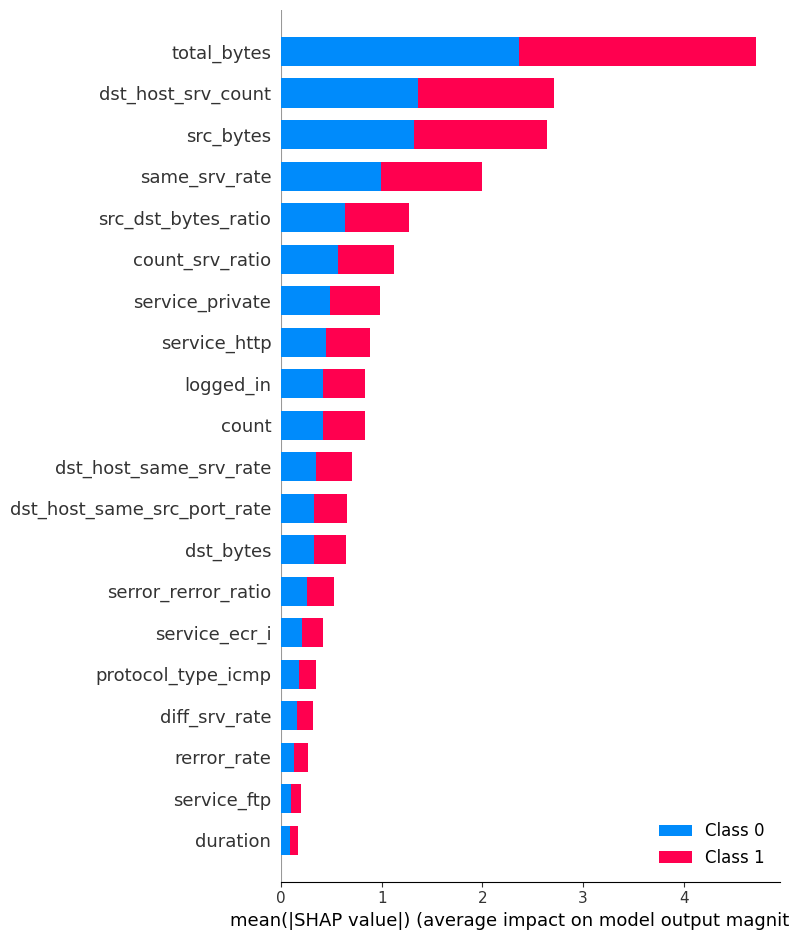

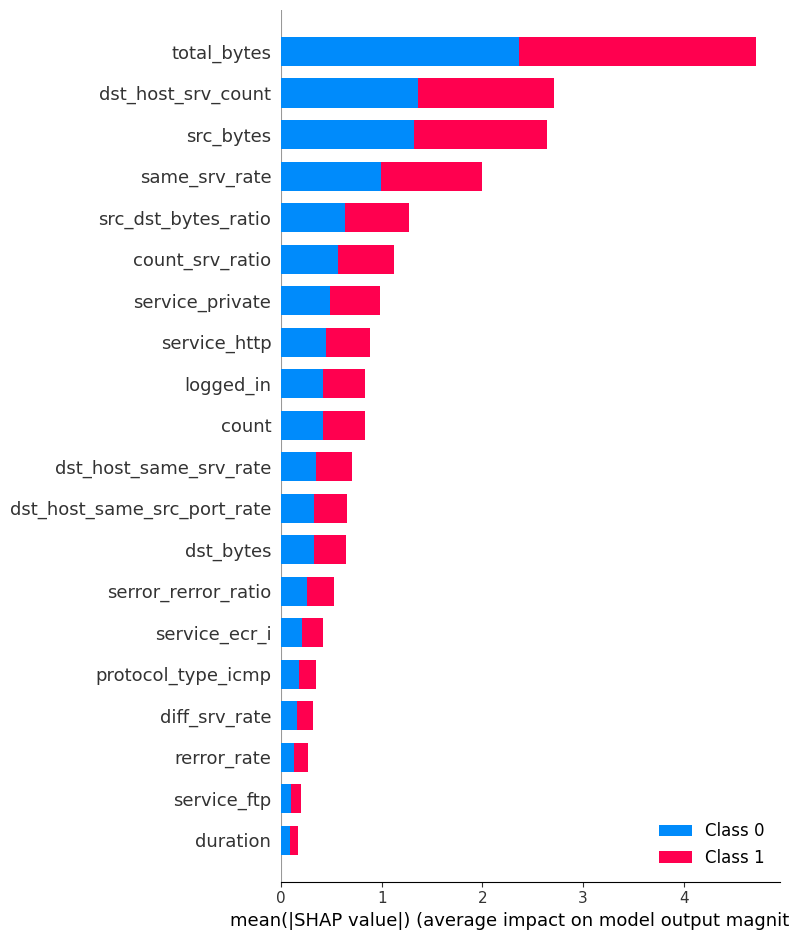

In [34]:
try:
    import shap
    explainer = shap.TreeExplainer(lgbm)
    shap_values = explainer.shap_values(X_test.iloc[:100])
    shap.summary_plot(shap_values, X_test.iloc[:100], plot_type='bar')
    shap.summary_plot(shap_values, X_test.iloc[:100])
except ImportError:
    print('SHAP is not installed. Please install shap to run this cell.')

## 18. Anomaly Detection: Isolation Forest and One-Class SVM
We are using unsupervised anomaly detection models to identify unusual network activity.

In [30]:
X_train_normal = X_train[y_train == 0]
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train_normal)
iso_preds = iso_forest.predict(X_test)
iso_anomalies = (iso_preds == -1).sum()
print(f'Isolation Forest (fit on normal only) detected {iso_anomalies} anomalies in the test set.')
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
ocsvm.fit(X_train_normal)
svm_preds = ocsvm.predict(X_test)
svm_anomalies = (svm_preds == -1).sum()
print(f'One-Class SVM (fit on normal only) detected {svm_anomalies} anomalies in the test set.')

Isolation Forest (fit on normal only) detected 6667 anomalies in the test set.
One-Class SVM (fit on normal only) detected 5884 anomalies in the test set.


## 19. Model Comparison Table and Single Input Prediction
We are evaluating all models using cross-validation, accuracy, F1-score, ROC-AUC, and false positives. We are summarizing the results in a table and saving the best model.

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import os
import pandas as pd
import numpy as np


def _to_array(X):
    if isinstance(X, np.ndarray):
        return X
    # sparse matrix
    if hasattr(X, 'toarray'):
        try:
            return X.toarray()
        except Exception:
            return np.asarray(X)
    # pandas DataFrame
    if hasattr(X, 'values'):
        return X.values
    # fallback
    return np.asarray(X)


def count_false_positives(y_true, y_pred):
    try:
        cm = confusion_matrix(y_true, y_pred, labels=[0,1])
        return int(cm[0,1])
    except Exception:
        cm = confusion_matrix(y_true, y_pred)
        return int(cm[0,1]) if cm.shape == (2,2) else 0

# Convert datasets to numpy arrays to avoid dtype/sparse issues in cross_val_score
X_train_bal_arr = _to_array(X_train_bal)
y_train_bal_arr = np.asarray(y_train_bal)
X_test_arr = _to_array(X_test) if 'X_test' in globals() else None

print('X_train_bal shape, dtype:', getattr(X_train_bal_arr, 'shape', None), getattr(X_train_bal_arr, 'dtype', None))
print('y_train_bal shape, unique counts:', np.unique(y_train_bal_arr, return_counts=True))
if X_test_arr is not None:
    print('X_test shape, dtype:', X_test_arr.shape, X_test_arr.dtype)

results = []
models = [
    ('Logistic Regression', logreg),
    ('Random Forest', rf),
    ('XGBoost', xgb),
    ('LightGBM', lgbm),
    ('Neural Network', mlp),
    ('Stacking Ensemble', stacking),
    ('Voting Ensemble', voting)
]

# quick CV diagnostic for Logistic Regression
try:
    print('\nDiagnostic: running cross_val_score for Logistic Regression (cv=3)')
    lr_cv = cross_val_score(logreg, X_train_bal_arr, y_train_bal_arr, cv=3, scoring='accuracy', n_jobs=-1)
    print('LogReg CV scores:', lr_cv, 'mean:', lr_cv.mean())
except Exception as e:
    print('Diagnostic CV for Logistic Regression failed:', e)

# Make output file
os.makedirs('notebook', exist_ok=True)
out_path = os.path.join('notebook', 'model_comparison_results.csv')

# Create y_test if df_test has labels
y_test = None
if 'df_test' in globals() and 'class' in df_test.columns:
    try:
        y_test = le.transform(df_test['class'])
        print('y_test created from df_test.class')
    except Exception as e:
        print('Could not create y_test:', e)

if y_test is not None and X_test_arr is not None:
    print("Evaluating models on the test set and saving condensed results to CSV...")
    for name, model in models:
        try:
            y_pred = model.predict(X_test_arr)
        except Exception as e:
            print(f"Skipping {name}: prediction failed: {e}")
            continue

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # ROC-AUC via predict_proba or decision_function
        roc = 'N/A'
        try:
            if hasattr(model, 'predict_proba'):
                roc = roc_auc_score(y_test, model.predict_proba(X_test_arr)[:, 1])
            elif hasattr(model, 'decision_function'):
                roc = roc_auc_score(y_test, model.decision_function(X_test_arr))
        except Exception as e:
            roc = f'Error: {e}'

        fp = count_false_positives(y_test, y_pred)
        try:
            cv = cross_val_score(model, X_train_bal_arr, y_train_bal_arr, cv=5, scoring='accuracy', n_jobs=-1).mean()
        except Exception as e:
            cv = f'Error: {e}'

        results.append([name, round(acc*100,2), round(f1*100,2) if isinstance(f1,(int,float)) else f1,
                        round(roc*100,2) if isinstance(roc,(int,float)) else roc, int(fp),
                        round(cv*100,2) if isinstance(cv,(int,float)) else cv])

    results_df = pd.DataFrame(results, columns=['Technique','Accuracy','F1 Score','ROC-AUC','False Positives','CV Accuracy'])
    # Save with pandas, fallback to csv module if pandas internals fail
    try:
        results_df.to_csv(out_path, index=False)
    except Exception as e:
        import csv
        with open(out_path, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(results_df.columns.tolist())
            for row in results_df.values:
                writer.writerow([str(x) for x in row])
        print('Used csv fallback to save results due to:', e)

    print(f'Results saved to {out_path}. Showing table:')
    print(results_df.to_string(index=False))

    # Save best model (test-set accuracy)
    try:
        best_idx = results_df['Accuracy'].idxmax()
        best_name = results_df.iloc[best_idx]['Technique']
        model_map = {name: model for name, model in models}
        best_model = model_map.get(best_name)
        if best_model is not None:
            import joblib
            joblib.dump(best_model, os.path.join('notebook','best_model.pkl'))
            print(f'Saved best model: {best_name} -> notebook/best_model.pkl')
    except Exception as e:
        print('Could not save best model:', e)

else:
    print("df_test has no labels or X_test not available; skipping test-set evaluation. Performing CV on balanced training set and saving results.")
    results_cv = []
    for name, model in models:
        try:
            cv_scores = cross_val_score(model, X_train_bal_arr, y_train_bal_arr, cv=5, scoring='accuracy', n_jobs=-1)
            print(f'{name} CV scores:', cv_scores, 'mean:', np.nanmean(cv_scores))
            cv = np.nanmean(cv_scores)
        except Exception as e:
            print(f'CV for {name} failed:', e)
            cv = np.nan
        results_cv.append([name, round(float(cv*100),2) if (isinstance(cv,(int,float)) or (isinstance(cv, np.floating))) and not np.isnan(cv) else np.nan])
    results_cv_df = pd.DataFrame(results_cv, columns=['Technique','CV Accuracy'])
    try:
        results_cv_df.to_csv(out_path, index=False)
    except Exception as e:
        import csv
        with open(out_path, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(results_cv_df.columns.tolist())
            for row in results_cv_df.values:
                writer.writerow([str(x) for x in row])
        print('Used csv fallback to save CV results due to:', e)
    print(f'CV results saved to {out_path}. Showing table:')
    print(results_cv_df.to_string(index=False))
    # Save Random Forest as practical default
    try:
        import joblib
        model_map = {name: model for name, model in models}
        if 'Random Forest' in model_map:
            joblib.dump(model_map['Random Forest'], os.path.join('notebook','best_model.pkl'))
            print('Saved Random Forest as notebook/best_model.pkl')
    except Exception as e:
        print('Could not save Random Forest model:', e)


df_test has no labels; skipping test-set evaluation. Performing CV on balanced training set and saving results.
Used csv fallback to save CV results due to: cannot import name 'SequenceNotStr' from 'pandas._typing' (c:\Users\USER\anaconda3\Lib\site-packages\pandas\_typing.py)
CV results saved to notebook\model_comparison_results.csv. Showing table:
          Technique  CV Accuracy
Logistic Regression          NaN
      Random Forest          NaN
            XGBoost          NaN
           LightGBM          NaN
     Neural Network          NaN
  Stacking Ensemble          NaN
    Voting Ensemble          NaN
Used csv fallback to save CV results due to: cannot import name 'SequenceNotStr' from 'pandas._typing' (c:\Users\USER\anaconda3\Lib\site-packages\pandas\_typing.py)
CV results saved to notebook\model_comparison_results.csv. Showing table:
          Technique  CV Accuracy
Logistic Regression          NaN
      Random Forest          NaN
            XGBoost          NaN
           Lig

## 20. Recommended Feature Set for Deployment
For a real-world deployment, we recommend using the following features for a balance of accuracy and efficiency:
- protocol_type
- service
- flag
- duration
- src_bytes
- dst_bytes
- logged_in
- serror_rate
- rerror_rate
- same_srv_rate
- diff_srv_rate
- srv_diff_host_rate
- dst_host_count
- dst_host_srv_count
- dst_host_same_srv_rate
- (plus any engineered features that improve performance)
This set is based on feature selection, domain knowledge, and practical deployment considerations.

## 21. Streamlit App Structure Recommendation
We are recommending sections for a professional Streamlit app for deployment.

- Authentication & User Management (SQLite)
- Dashboard (overview, key metrics, recent alerts)
- Data Exploration & EDA (interactive explorer, visualizations)
- Model Comparison (table, ROC curves, confusion matrices)
- AutoML Results (TPOT, best pipeline, metrics)
- Feature Importance & Interpretability (SHAP, explanations)
- Anomaly Detection (Isolation Forest, One-Class SVM, visualizations)
- Real-Time Detection (upload/stream data, live prediction)
- Alerts & Monitoring (list, filter, export alerts)
- User Settings & Profile
- Documentation & Help
- Admin Panel (optional)
This structure will make your app advanced, user-friendly, and suitable for a high-level final year project.